In [242]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [43]:
#read image set
test_path = os.path.abspath('./archive/test')
image_test = []

for filename in os.listdir(test_path):
    img_path = os.path.join(test_path, filename)
    img = cv2.imread(img_path)
    if img is not None:
        image_test.append(img)

train_good_path = os.path.abspath('./archive/train/good')
train_not_good_path = os.path.abspath('./archive/train/not-good')
train_path = [train_good_path, train_not_good_path]
image_train = []
image_train_good = []
image_train_not_good = []

for path in train_path:
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            image_train.append(img)
            if path is train_good_path:
                image_train_good.append(img)
            else:
                image_train_not_good.append(img)

print("Train set size: " + str(len(image_train)))
print("Train good set size: " + str(len(image_train_good)))
print("Train not good set size: " + str(len(image_train_not_good)))
print("Test set size: " + str(len(image_test)))


Train set size: 300
Train good set size: 250
Train not good set size: 50
Test set size: 180


Found 10 images in manipulated_front case!
Found 10 images in scratch_head case!
Found 10 images in scratch_neck case!
Found 10 images in thread_side case!
Found 10 images in thread_top case!


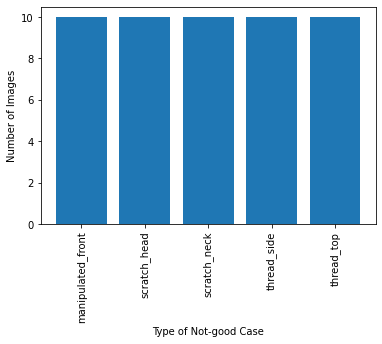

<Figure size 432x288 with 0 Axes>

In [48]:
#count different not-good type's cases 
fault_type = ['manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']
fault_type_count = [0, 0, 0, 0, 0]
for filename in os.listdir(train_not_good_path):
    for i in range(5):
        if filename.lower().startswith(fault_type[i]):
            fault_type_count[i] += 1
            break

for i in range(5):
    print(f"Found {fault_type_count[i]} images in {fault_type[i]} case!")

#visualize the distribution of not-good images
#create a bar chart
plt.bar(fault_type, fault_type_count)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.xlabel("Type of Not-good Case") 
plt.show()
    

In [243]:
import glob

class MyDataset(data.Dataset):
    def __init__(self, img_paths, labels, transform):
        self.imgs = img_paths
        self.labels = torch.Tensor(labels)
        self.transforms = transform
    def __getitem__(self, index):
        img = self.imgs[index]
        label = self.labels[index]
        pil_img = Image.open(img)
        data = self.transforms(pil_img)
        return data, label
    def __len__(self):
        return len(self.imgs)

In [274]:
all_imgs_path = glob.glob('./archive/train/*/*.png')
for var in all_imgs_path:
    print(var)

./archive/train\good\ok000.png
./archive/train\good\ok001.png
./archive/train\good\ok002.png
./archive/train\good\ok003.png
./archive/train\good\ok004.png
./archive/train\good\ok005.png
./archive/train\good\ok006.png
./archive/train\good\ok007.png
./archive/train\good\ok008.png
./archive/train\good\ok009.png
./archive/train\good\ok010.png
./archive/train\good\ok011.png
./archive/train\good\ok012.png
./archive/train\good\ok013.png
./archive/train\good\ok014.png
./archive/train\good\ok015.png
./archive/train\good\ok016.png
./archive/train\good\ok017.png
./archive/train\good\ok018.png
./archive/train\good\ok019.png
./archive/train\good\ok020.png
./archive/train\good\ok021.png
./archive/train\good\ok022.png
./archive/train\good\ok023.png
./archive/train\good\ok024.png
./archive/train\good\ok025.png
./archive/train\good\ok026.png
./archive/train\good\ok027.png
./archive/train\good\ok028.png
./archive/train\good\ok029.png
./archive/train\good\ok030.png
./archive/train\good\ok031.png
./archiv

In [275]:
classes = ['ok', 'manipulated_front', 'scratch_head', 'scratch_neck', 'thread_side', 'thread_top']
classes_to_id = dict((c, i) for i, c in enumerate(classes))
print(classes_to_id)
id_to_classes = dict((v, k) for k, v in classes_to_id.items())
print(id_to_classes)

all_labels = []

for img in all_imgs_path:
    for i, c in enumerate(classes):
        if c in img:
            all_labels.append(i)

print(all_labels)

{'ok': 0, 'manipulated_front': 1, 'scratch_head': 2, 'scratch_neck': 3, 'thread_side': 4, 'thread_top': 5}
{0: 'ok', 1: 'manipulated_front', 2: 'scratch_head', 3: 'scratch_neck', 4: 'thread_side', 5: 'thread_top'}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

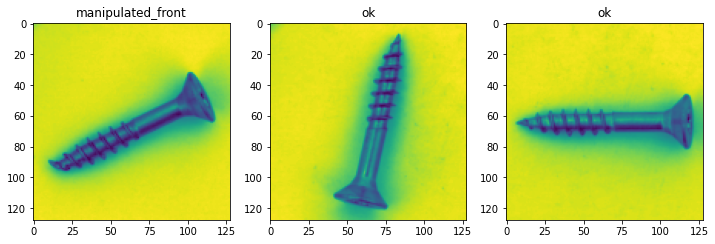

In [266]:
transform = transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ]
)

all_train_dataset = MyDataset(all_imgs_path, all_labels, transform)
all_train_dataloader = data.DataLoader(all_train_dataset, batch_size=4, shuffle=True)

imgs_batch, labels_batch = next(iter(all_train_dataloader))

plt.figure(figsize=(12,8))
for i, (img, label) in enumerate(zip(imgs_batch[:3], labels_batch[:3])):
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(2, 3, i+1)
    plt.title(id_to_classes.get(label.item()))
    plt.imshow(img)
plt.show()

In [267]:
# In all train dataset, still we set a 0.8 threshold to divide a 80% of all train set as a new "train set", and other 20% as "test set"
# This action is to ensure we have a "test set" with labels
index = np.random.permutation(len(all_imgs_path))
all_imgs_path = np.array(all_imgs_path)[index]
all_labels = np.array(all_labels)[index]

# 80% as train set
s = int(len(all_imgs_path) * 0.6)
print(s)

train_imgs = all_imgs_path[:s]
train_labels = all_labels[:s]
test_imgs = all_imgs_path[s:]
test_labels = all_labels[s:]

train_ds = MyDataset(train_imgs, train_labels, transform)
test_ds = MyDataset(test_imgs, test_labels, transform)
train_loader = data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = data.DataLoader(test_ds, batch_size=64, shuffle=True)

180


In [268]:
# Define a convolution neural network
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5, stride=1, padding='same')
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding='same')
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding='same')
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding='same')
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*64*64, 6)

    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))   
        output = self.pool(output)                    
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*64*64)
        output = self.fc1(output)

        return output

# Instantiate a neural network model 
model = Network()

In [269]:
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.00001)

In [270]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images.to(device))
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels.to(device)).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            labels = labels.long()
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if (i % 100 == 0):    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.8f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %.3f %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

In [271]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show the images
def imageshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Function to test the model with a batch of images and show the labels predictions
def testBatch(batch_size):
    # get batch of images from the test DataLoader  
    images, labels = next(iter(test_loader))

    # show all images as one image grid
    imageshow(torchvision.utils.make_grid(images))
   
    # Show the real labels on the screen 
    print('Real labels: ', ' '.join('%5s' % classes[labels[j]] 
                               for j in range(batch_size)))
  
    # Let's see what if the model identifiers the  labels of those example
    outputs = model(images)
    
    # We got the probability for every 10 labels. The highest (max) probability should be correct label
    _, predicted = torch.max(outputs, 1)
    
    # Let's show the predicted labels on the screen to compare with the real ones
    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] 
                              for j in range(batch_size)))

In [272]:
# Let's build our model
train(5)
print('Finished Training')

# Test which classes performed well
testAccuracy()

# Let's load the model we just created and test the accuracy per label
model = Network()
path = "myFirstModel.pth"
model.load_state_dict(torch.load(path))

# Test with batch of images
# testBatch(4)

The model will be running on cuda:0 device
[1,     1] loss: 0.00081102
predicted:tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
total :64.0
accuracy : 49.0
predicted:tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
total :120.0
accuracy : 97.0
For epoch 1 the test accuracy over the whole test set is 80.833 %
[2,     1] loss: 0.00048723
predicted:tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')
total :64.0
accuracy : 53.0
predicted:tensor([0, 0, 0, 0, 0, 0, 0, 0, 

<All keys matched successfully>